# 🎓 Your First Machine Learning Project: Prostate Cancer Analysis

**Welcome!** This notebook is your friendly introduction to machine learning. Don't worry if you've never done this before - I'll explain everything step by step, like teaching a friend.

## What We're Going To Do

We're going to use **machine learning** to predict prostate cancer indicators from patient data. Think of machine learning as teaching a computer to find patterns in data - just like you might notice that "when it's cloudy, it usually rains," machine learning helps computers find similar patterns in medical data.

By the end of this tutorial, you'll:
- ✅ Understand what machine learning actually is
- ✅ Know how to explore and visualize medical data
- ✅ Build 5 different machine learning models
- ✅ Compare which models work best
- ✅ Understand what your results mean for prostate cancer research

Let's get started! 🚀

---
## 📦 Section 1: Setting Up Your Environment

First, we need to import **libraries** - these are like toolboxes that other programmers have built for us. Instead of writing everything from scratch, we can use their tools!

### What each library does:
- **pandas**: Helps us work with data in tables (like Excel)
- **numpy**: Does mathematical calculations super fast
- **matplotlib & seaborn**: Creates beautiful charts and graphs
- **sklearn** (scikit-learn): The main machine learning library - has lots of pre-built models
- **tensorflow**: Builds neural networks (we'll explain this later!)

In [1]:
# System libraries
import warnings
warnings.filterwarnings('ignore')  # This hides warning messages to keep things clean

# Data manipulation - working with tables of data
import numpy as np  # For math and numbers
import pandas as pd  # For working with data tables

# Visualization - making charts and graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and tools
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Deep Learning (Neural Networks)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set styling for our graphs to make them look nice
sns.set_theme(style='whitegrid', font='serif')
plt.rcParams['figure.figsize'] = (10, 6)  # Make graphs a good size

print("✅ All libraries loaded successfully!")
print(f"📊 Using TensorFlow version: {tf.__version__}")

Matplotlib is building the font cache; this may take a moment.


✅ All libraries loaded successfully!
📊 Using TensorFlow version: 2.20.0


---
## 📊 Section 2: Understanding Your Data

Now let's load our prostate cancer dataset and understand what we're working with.

### What is this dataset?
This is real medical data from prostate cancer patients. Each row represents one patient, and each column is a measurement or test result.

### What do the column names mean?
The names are medical abbreviations. Here's what they actually mean:

- **lcavol**: Log of cancer volume (how big the tumor is)
- **lweight**: Log of prostate weight
- **age**: Patient's age in years
- **lbph**: Log of benign prostatic hyperplasia amount (non-cancerous growth)
- **svi**: Seminal vesicle invasion (0 = no, 1 = yes) - has cancer spread?
- **lcp**: Log of capsular penetration (how far cancer has spread)
- **gleason**: Gleason score (a grading system for prostate cancer, 6-10)
- **pgg45**: Percentage of Gleason scores 4 or 5 (higher = more aggressive)
- **lpsa**: Log of PSA level (**this is what we want to predict!**)
- **train**: Whether this data point was used for training (we'll use this later)

**PSA (Prostate-Specific Antigen)** is a protein that, when elevated, can indicate prostate cancer. Doctors use it as a screening tool.

In [2]:
# Load the dataset
data = pd.read_csv('data/prostate.csv')

print("📈 Dataset loaded successfully!")
print(f"\n📊 We have {len(data)} patients in our dataset\n")

# Look at the first few rows
print("First 5 patients:")
data.head()

📈 Dataset loaded successfully!

📊 We have 97 patients in our dataset

First 5 patients:


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


In [3]:
# Get basic information about our data
print("📋 Dataset Information:\n")
print(data.info())

print("\n📊 Statistical Summary:")
print("(This shows us the average, min, max, etc. for each column)\n")
data.describe()

📋 Dataset Information:

<class 'pandas.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
 9   train    97 non-null     bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 7.0 KB
None

📊 Statistical Summary:
(This shows us the average, min, max, etc. for each column)



,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


---
## 🔍 Section 3: Data Exploration and Visualization

Before we build any models, we need to **understand our data visually**. This is like getting to know someone before working with them!

### Why visualize data?
- 👀 See patterns that numbers alone don't show
- 🔎 Find unusual values (outliers)
- 💡 Understand relationships between variables
- 📈 Make informed decisions about which models to use

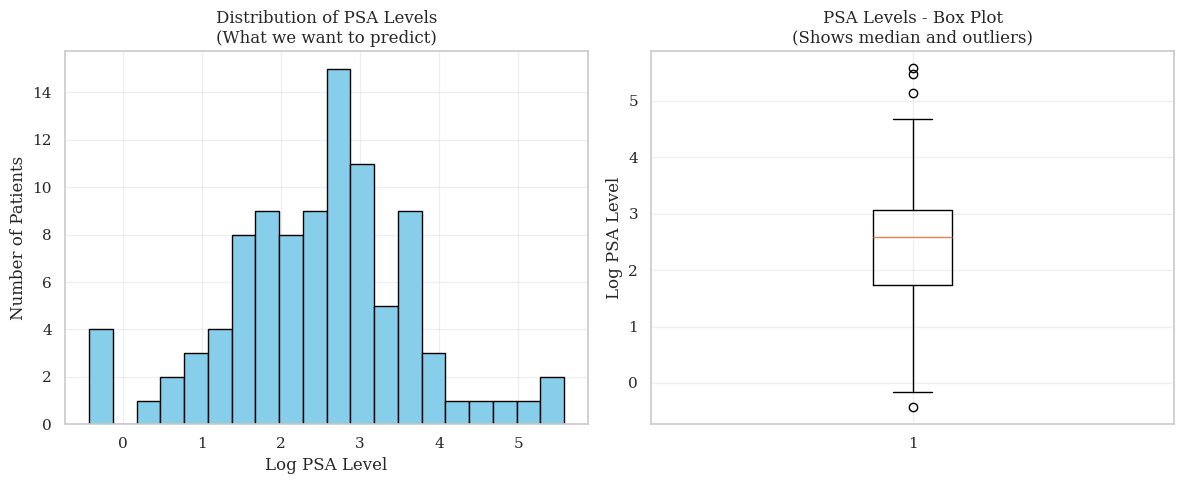

📊 The histogram shows how PSA levels are distributed across patients.
📦 The box plot shows the median (middle line) and any unusual values.


In [4]:
# Visualize the distribution of our target variable (lpsa)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['lpsa'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Log PSA Level')
plt.ylabel('Number of Patients')
plt.title('Distribution of PSA Levels\n(What we want to predict)')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(data['lpsa'], vert=True)
plt.ylabel('Log PSA Level')
plt.title('PSA Levels - Box Plot\n(Shows median and outliers)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 The histogram shows how PSA levels are distributed across patients.")
print("📦 The box plot shows the median (middle line) and any unusual values.")

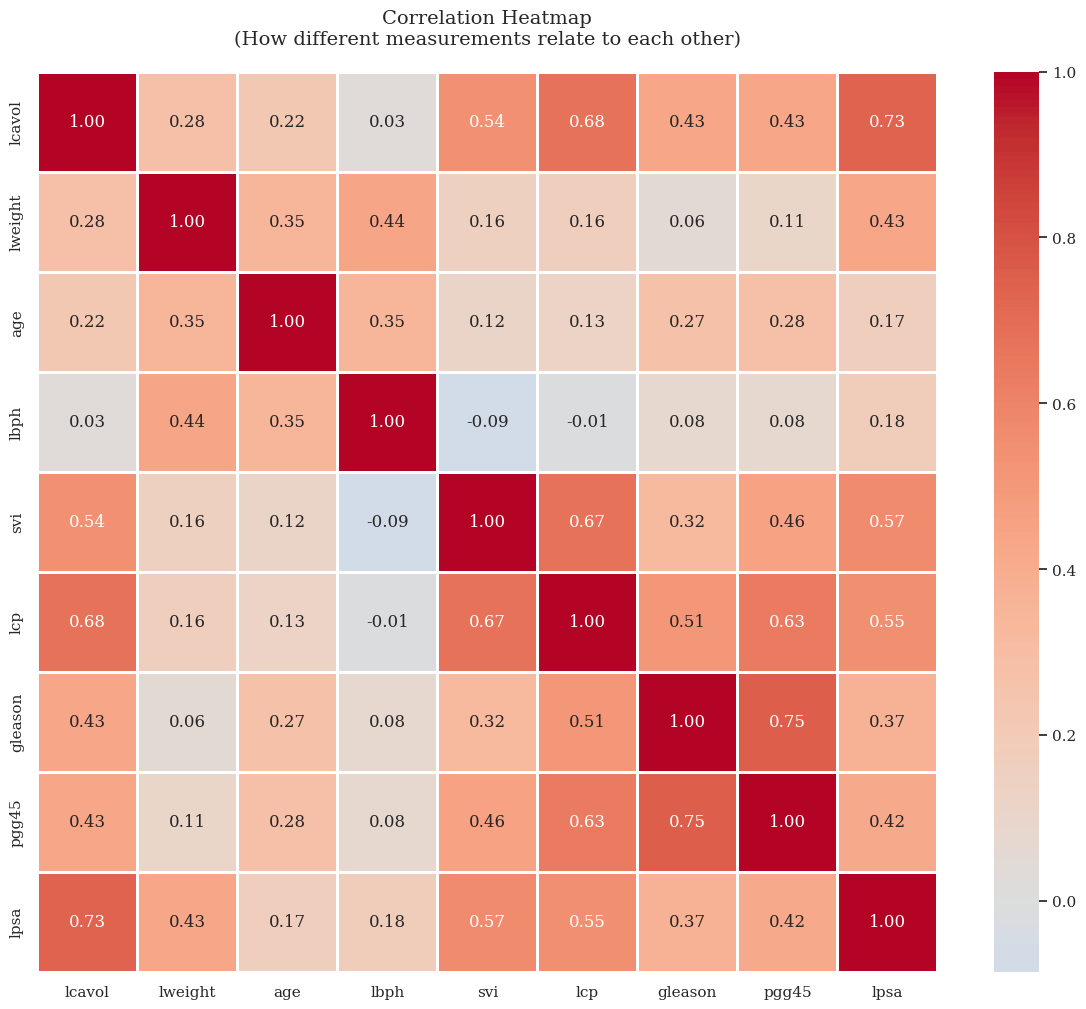


🔥 What to look for:
  • Dark red = strong positive correlation (variables increase together)
  • Dark blue = strong negative correlation (one increases, other decreases)
  • White = no correlation (variables are independent)

💡 Look at the 'lpsa' row - these are variables that might help predict PSA!


In [ ]:
# Create a correlation heatmap
# This shows which variables are related to each other

plt.figure(figsize=(12, 10))

# Calculate correlations (how variables relate to each other)
# Values close to 1 = strong positive relationship
# Values close to -1 = strong negative relationship
# Values close to 0 = no relationship

correlation_matrix = data.drop(columns=['train']).corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap\n(How different measurements relate to each other)', 
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\n🔥 What to look for:")
print("  • Dark red = strong positive correlation (variables increase together)")
print("  • Dark blue = strong negative correlation (one increases, other decreases)")
print("  • White = no correlation (variables are independent)")
print("\n💡 Look at the 'lpsa' row - these are variables that might help predict PSA!")

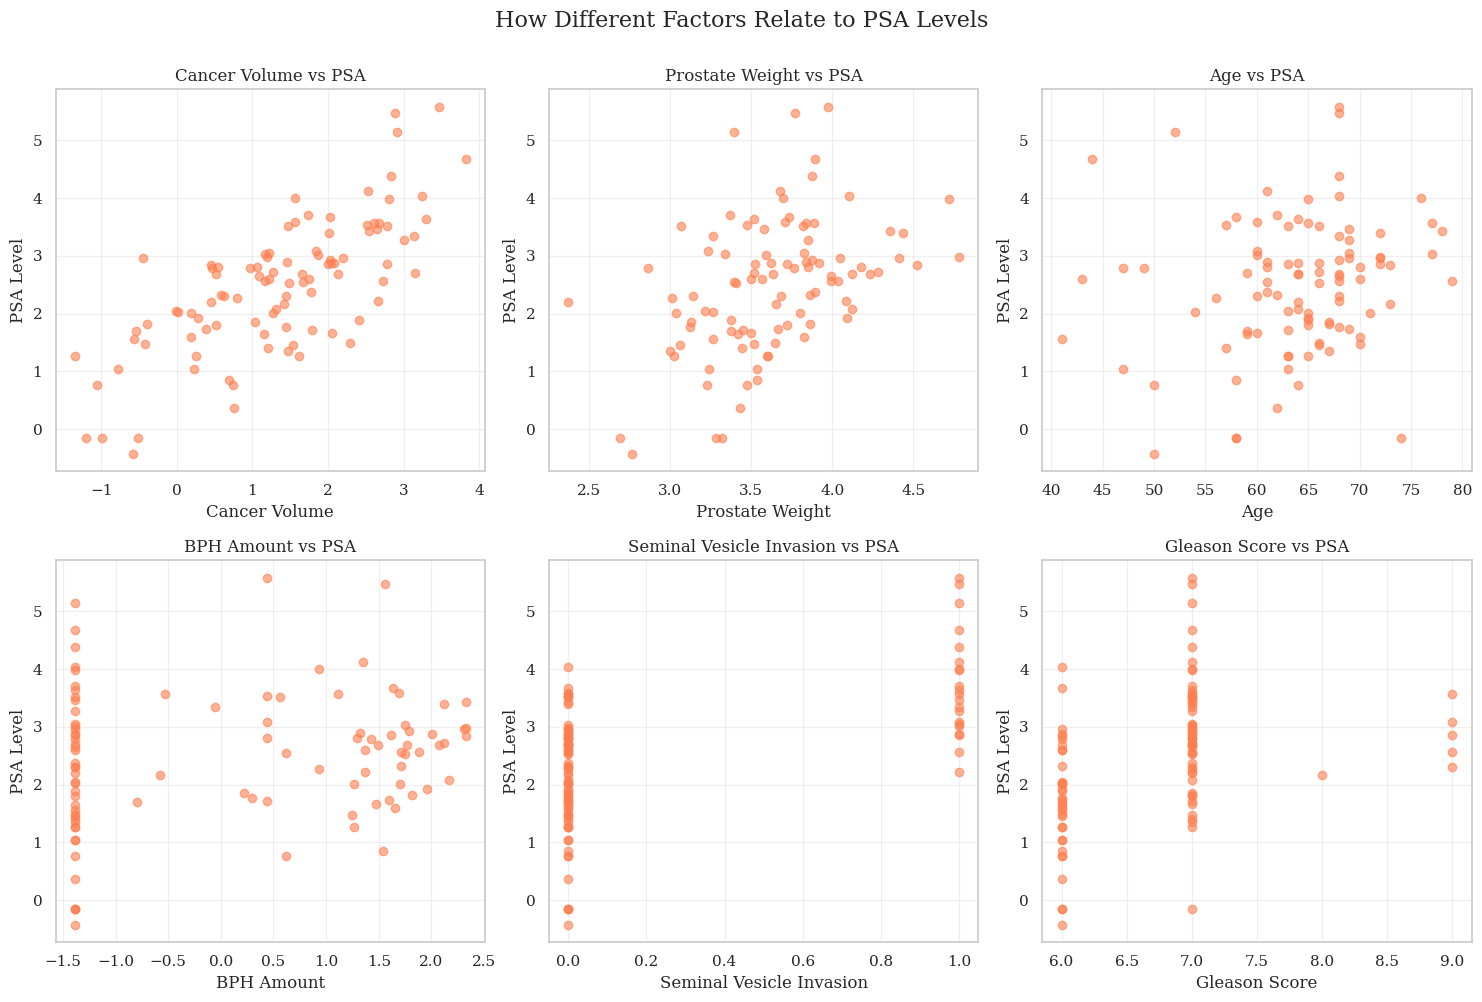

📈 Each dot is one patient. Look for patterns!
   • Upward slope = as this factor increases, PSA tends to increase
   • Downward slope = as this factor increases, PSA tends to decrease
   • Random scatter = this factor doesn't strongly predict PSA


In [ ]:
# Let's look at relationships between specific features and PSA
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

features_to_plot = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'gleason']
feature_names = ['Cancer Volume', 'Prostate Weight', 'Age', 
                 'BPH Amount', 'Seminal Vesicle Invasion', 'Gleason Score']

for i, (feature, name) in enumerate(zip(features_to_plot, feature_names)):
    row, col = i // 3, i % 3
    axes[row, col].scatter(data[feature], data['lpsa'], alpha=0.6, color='coral')
    axes[row, col].set_xlabel(name)
    axes[row, col].set_ylabel('PSA Level')
    axes[row, col].set_title(f'{name} vs PSA')
    axes[row, col].grid(alpha=0.3)

plt.suptitle('How Different Factors Relate to PSA Levels', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

print("📈 Each dot is one patient. Look for patterns!")
print("   • Upward slope = as this factor increases, PSA tends to increase")
print("   • Downward slope = as this factor increases, PSA tends to decrease")
print("   • Random scatter = this factor doesn't strongly predict PSA")

---
## 🎯 Section 4: Preparing Data for Machine Learning

Now we need to prepare our data for machine learning. This is like preparing ingredients before cooking!

### Two important concepts:

#### 1. **Train/Test Split**
We split our data into two parts:
- **Training data (80%)**: We use this to teach our model
- **Testing data (20%)**: We use this to see how well our model learned

**Why?** Imagine studying for a test. If the test has the exact same questions you studied, you can't tell if you truly understand the material or just memorized answers. Same with machine learning - we test on data the model hasn't seen before.

#### 2. **Standardization (Scaling)**
Different measurements have different scales:
- Age: 40-80 years
- PSA: 0-5 (on log scale)

Some ML models get confused by this! Standardization puts everything on the same scale so the model can learn better. It's like converting all measurements to the same units.

In [7]:
# Step 1: Separate our features (X) from our target (y)

# Convert the 'train' column from TRUE/FALSE to 1/0
data['train'] = data['train'].astype(int)

# X = all columns except 'lpsa' (these are our inputs/features)
X = data.drop(columns=['lpsa'])

# y = only the 'lpsa' column (this is what we want to predict)
y = data['lpsa']

print("📊 Features (X):")
print(f"   Shape: {X.shape} (meaning {X.shape[0]} patients, {X.shape[1]} features)")
print(f"   Columns: {list(X.columns)}\n")

print("🎯 Target (y):")
print(f"   Shape: {y.shape} (meaning {y.shape[0]} PSA values)")
print(f"   What we're predicting: PSA levels")

📊 Features (X):
   Shape: (97, 9) (meaning 97 patients, 9 features)
   Columns: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'train']

🎯 Target (y):
   Shape: (97,) (meaning 97 PSA values)
   What we're predicting: PSA levels


In [8]:
# Step 2: Split into training and testing sets
# test_size=0.2 means 20% for testing, 80% for training
# random_state=42 ensures we get the same split every time (for reproducibility)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✂️ Data Split Complete!\n")
print(f"📚 Training set: {len(X_train)} patients ({len(X_train)/len(X)*100:.0f}%)")
print(f"🧪 Testing set: {len(X_test)} patients ({len(X_test)/len(X)*100:.0f}%)")
print("\n💡 We'll teach our model using the training set,")
print("   then test it on the testing set to see how well it learned!")

✂️ Data Split Complete!

📚 Training set: 77 patients (79%)
🧪 Testing set: 20 patients (21%)

💡 We'll teach our model using the training set,
   then test it on the testing set to see how well it learned!


In [9]:
# Step 3: Standardize the features
# This puts all features on the same scale

scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform testing data
# (Important: we only FIT on training data, but TRANSFORM both!)
X_test_scaled = scaler.transform(X_test)

print("⚖️ Data Standardization Complete!\n")
print("Before standardization (sample):")
print(X_train.iloc[0])
print("\nAfter standardization (same sample):")
print(X_train_scaled[0])
print("\n💡 Notice how the values are now smaller and on a similar scale!")
print("   Values around 0 with standard deviation of 1 - this helps ML models learn better.")

⚖️ Data Standardization Complete!

Before standardization (sample):
lcavol      1.220830
lweight     3.568123
age        70.000000
lbph        1.373716
svi         0.000000
lcp        -0.798508
gleason     6.000000
pgg45       0.000000
train       0.000000
Name: 49, dtype: float64

After standardization (same sample):
[-0.12469333 -0.21218779  0.78741288  0.80598507 -0.53229065 -0.42892998
 -1.21976137 -0.84401113 -1.44222051]

💡 Notice how the values are now smaller and on a similar scale!
   Values around 0 with standard deviation of 1 - this helps ML models learn better.


---
## 🎨 Section 5: Your First Model - Linear Regression

Time to build your first machine learning model! 🎉

### What is Linear Regression?

Remember drawing a "line of best fit" in high school math? That's basically what linear regression does!

**The idea:** Find the straight line (or in our case, a hyperplane since we have multiple variables) that best fits the data points. Then we can use this line to predict new values.

**In simple terms:**
- Linear regression tries to find the relationship between our features (age, cancer volume, etc.) and PSA levels
- It creates an equation: `PSA = (weight1 × feature1) + (weight2 × feature2) + ... + constant`
- The model "learns" the best weights to minimize prediction errors

**When to use it:**
- ✅ Great for understanding which features are important
- ✅ Fast to train and easy to interpret
- ✅ Works well when relationships are roughly linear
- ❌ Not good for complex, non-linear relationships

In [10]:
# Create and train the Linear Regression model

print("🏗️ Building Linear Regression model...\n")

# Step 1: Initialize (create) the model
lr_model = LinearRegression()

# Step 2: Train the model (this is where the "learning" happens!)
lr_model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!\n")

# Let's see what the model learned
print("📊 Feature Importance (Coefficients):")
print("(Larger absolute values = more important for prediction)\n")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance)

print("\n💡 Interpretation:")
print("   • Positive coefficient = as this increases, PSA tends to increase")
print("   • Negative coefficient = as this increases, PSA tends to decrease")
print("   • Larger absolute value = stronger influence on PSA prediction")

🏗️ Building Linear Regression model...

✅ Model trained successfully!

📊 Feature Importance (Coefficients):
(Larger absolute values = more important for prediction)

   Feature  Coefficient
0   lcavol     0.657218
4      svi     0.325895
1  lweight     0.247645
5      lcp    -0.176832
2      age    -0.169793
3     lbph     0.105725
7    pgg45     0.096572
6  gleason     0.044931
8    train     0.029217

💡 Interpretation:
   • Positive coefficient = as this increases, PSA tends to increase
   • Negative coefficient = as this increases, PSA tends to decrease
   • Larger absolute value = stronger influence on PSA prediction


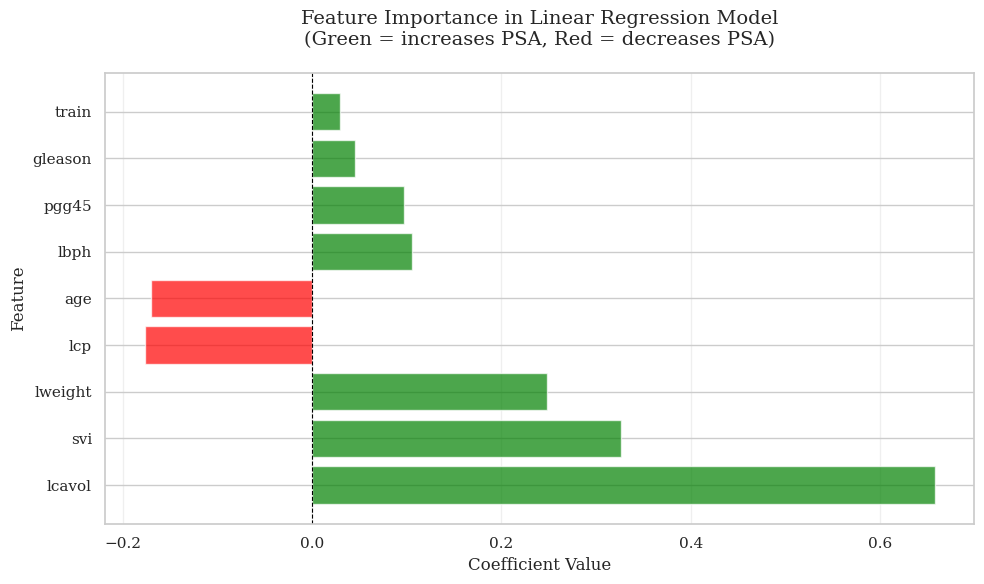

In [11]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Linear Regression Model\n(Green = increases PSA, Red = decreases PSA)', 
          fontsize=14, pad=20)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [13]:
# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

print("🔮 Making predictions on test data...\n")
print("Sample predictions vs actual values:\n")

comparison_df = pd.DataFrame({
    'Actual PSA': y_test[:10].values,
    'Predicted PSA': y_pred_lr[:10],
    'Difference': y_test[:10].values - y_pred_lr[:10]
})

print(comparison_df)
print("\n💡 The model is trying to predict the actual PSA values!")
print("   The closer 'Predicted' is to 'Actual', the better the model.")

🔮 Making predictions on test data...

Sample predictions vs actual values:

   Actual PSA  Predicted PSA  Difference
0    2.853592       3.028402   -0.174809
1    2.297573       2.194577    0.102996
2    4.684443       4.845467   -0.161023
3    1.558145       1.504028    0.054116
4    3.530763       2.952129    0.578634
5    3.570940       3.313772    0.257168
6    2.882004       2.588223    0.293780
7    2.327278       2.084797    0.242481
8    1.266948       1.578765   -0.311818
9   -0.430783       0.999309   -1.430092

💡 The model is trying to predict the actual PSA values!
   The closer 'Predicted' is to 'Actual', the better the model.


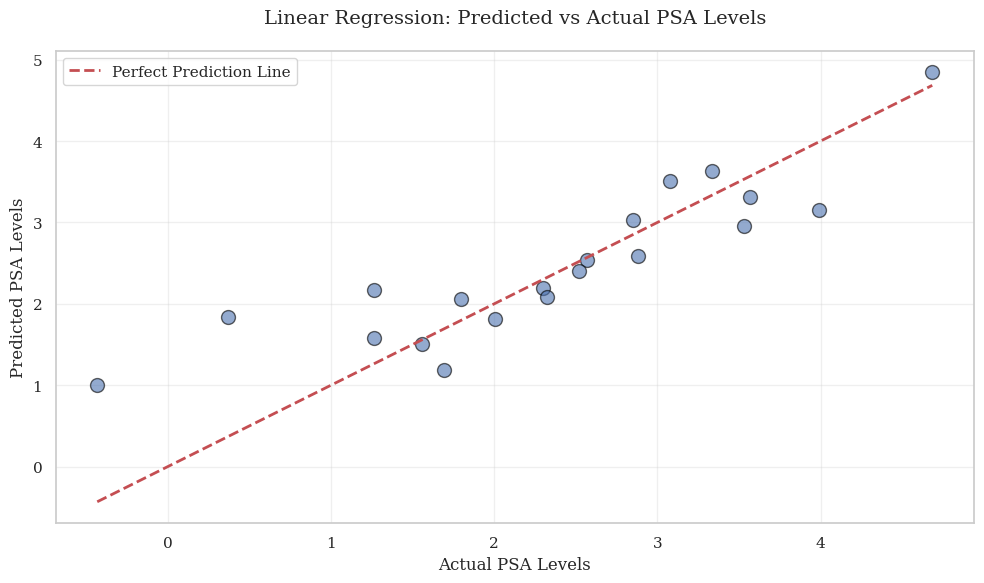

📊 If our model was perfect, all points would be on the red line!
   Points close to the line = good predictions
   Points far from the line = poor predictions


In [14]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, s=100, edgecolors='black', linewidth=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual PSA Levels', fontsize=12)
plt.ylabel('Predicted PSA Levels', fontsize=12)
plt.title('Linear Regression: Predicted vs Actual PSA Levels', fontsize=14, pad=20)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 If our model was perfect, all points would be on the red line!")
print("   Points close to the line = good predictions")
print("   Points far from the line = poor predictions")

---
## 📏 Section 6: Understanding Model Performance

How do we know if our model is good? We need metrics (measurements)!

### Two Key Metrics:

#### 1. **Mean Squared Error (MSE)**
- Measures the average squared difference between predicted and actual values
- **Lower is better!** (0 = perfect predictions)
- Think of it as: "On average, how wrong are my predictions?"
- Formula: Average of (actual - predicted)²

#### 2. **R² Score (R-squared)**
- Tells you what percentage of the variance in PSA your model explains
- **Ranges from 0 to 1** (1 = perfect, 0 = no better than guessing the average)
- Example: R² = 0.75 means your model explains 75% of the variation in PSA levels
- Think of it as: "How well does my model capture the patterns in the data?"

### Rule of Thumb:
- R² > 0.7: Great model! 🌟
- R² = 0.5-0.7: Good model ✅
- R² < 0.5: Needs improvement 📈

In [15]:
# Calculate performance metrics for Linear Regression

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("="*60)
print("📊 LINEAR REGRESSION PERFORMANCE")
print("="*60)
print(f"\n📉 Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"   → Lower is better. This is the average squared error.")
print(f"\n📈 R² Score: {r2_lr:.4f} ({r2_lr*100:.1f}%)")
print(f"   → Our model explains {r2_lr*100:.1f}% of the variance in PSA levels!")

if r2_lr > 0.7:
    print("\n🌟 Excellent! This is a strong model.")
elif r2_lr > 0.5:
    print("\n✅ Good! This model captures meaningful patterns.")
else:
    print("\n📈 Room for improvement. Let's try other models!")

print("\n" + "="*60)

📊 LINEAR REGRESSION PERFORMANCE

📉 Mean Squared Error (MSE): 0.3550
   → Lower is better. This is the average squared error.

📈 R² Score: 0.7519 (75.2%)
   → Our model explains 75.2% of the variance in PSA levels!

🌟 Excellent! This is a strong model.



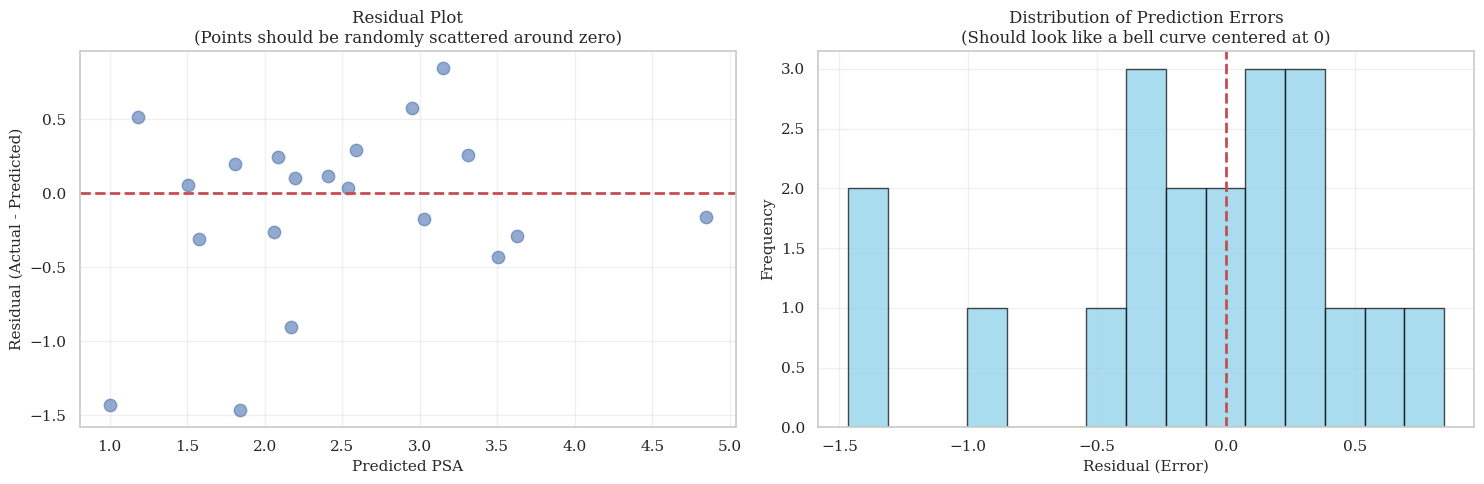

💡 What to look for:
   • Left plot: Random scatter = good! Pattern = model is missing something
   • Right plot: Bell curve centered at 0 = good predictions!


In [16]:
# Visualize the errors (residuals)
residuals = y_test - y_pred_lr

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Residual plot
axes[0].scatter(y_pred_lr, residuals, alpha=0.6, s=80)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted PSA', fontsize=11)
axes[0].set_ylabel('Residual (Actual - Predicted)', fontsize=11)
axes[0].set_title('Residual Plot\n(Points should be randomly scattered around zero)', fontsize=12)
axes[0].grid(alpha=0.3)

# Plot 2: Distribution of errors
axes[1].hist(residuals, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residual (Error)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Prediction Errors\n(Should look like a bell curve centered at 0)', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 What to look for:")
print("   • Left plot: Random scatter = good! Pattern = model is missing something")
print("   • Right plot: Bell curve centered at 0 = good predictions!")

---
## 🌳 Section 7: Decision Trees - A Different Approach

Now let's try a completely different type of model: **Decision Trees**!

### What is a Decision Tree?

Think of a decision tree like a flowchart that you might use to make a decision. It asks a series of yes/no questions:

```
Is cancer volume > 2.5?
├─ YES → Is patient age > 65?
│        ├─ YES → Predict HIGH PSA
│        └─ NO → Predict MEDIUM PSA
└─ NO → Predict LOW PSA
```

### How it works:
1. The model looks at all features and finds the best question to split the data
2. It keeps splitting until it creates groups that are very similar
3. For each group, it predicts the average PSA value

### Pros and Cons:
✅ **Pros:**
- Very easy to understand and explain
- Can capture non-linear relationships (curves in data)
- Works with both numbers and categories

❌ **Cons:**
- Can easily "overfit" (memorize training data instead of learning patterns)
- Sometimes unstable (small data changes = big model changes)
- May not perform as well as other models

In [17]:
# Create and train a Decision Tree model

print("🌳 Building Decision Tree model...\n")

# Create the model (random_state ensures reproducibility)
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # max_depth prevents overfitting

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("✅ Decision Tree trained!\n")
print("="*60)
print("📊 DECISION TREE PERFORMANCE")
print("="*60)
print(f"\n📉 Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"📈 R² Score: {r2_dt:.4f} ({r2_dt*100:.1f}%)\n")
print("="*60)

🌳 Building Decision Tree model...

✅ Decision Tree trained!

📊 DECISION TREE PERFORMANCE

📉 Mean Squared Error (MSE): 0.9535
📈 R² Score: 0.3337 (33.4%)



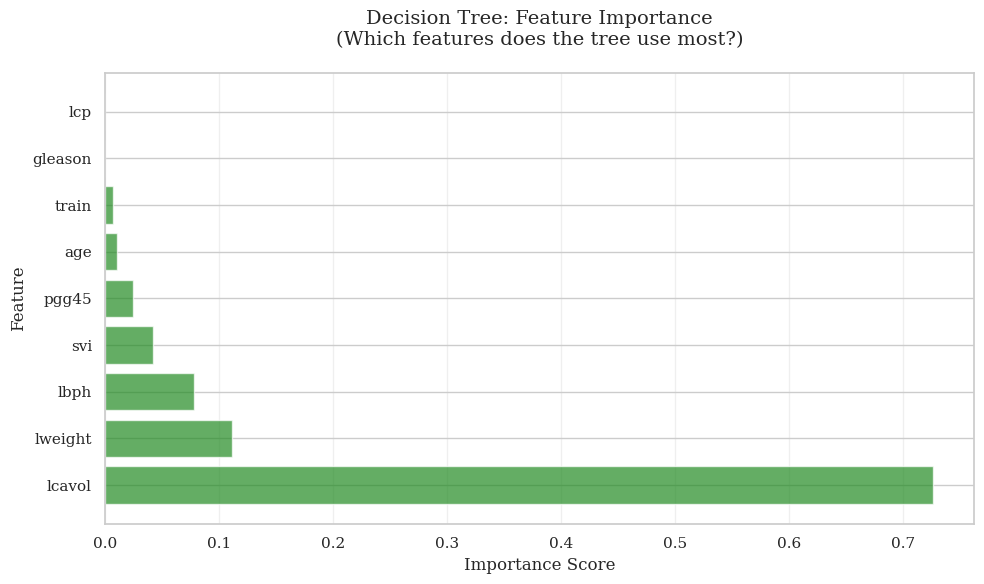

📊 Feature Importance Rankings:

   Feature  Importance
0   lcavol    0.725936
1  lweight    0.111582
3     lbph    0.078305
4      svi    0.042173
7    pgg45    0.024781
2      age    0.010205
8    train    0.007018
6  gleason    0.000000
5      lcp    0.000000

💡 The tree uses these features most for splitting decisions!


In [18]:
# Visualize feature importance for Decision Tree
# This shows which features the tree uses most for making decisions

feature_imp_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_imp_dt['Feature'], feature_imp_dt['Importance'], color='forestgreen', alpha=0.7)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Decision Tree: Feature Importance\n(Which features does the tree use most?)', 
          fontsize=14, pad=20)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("📊 Feature Importance Rankings:\n")
print(feature_imp_dt)
print("\n💡 The tree uses these features most for splitting decisions!")

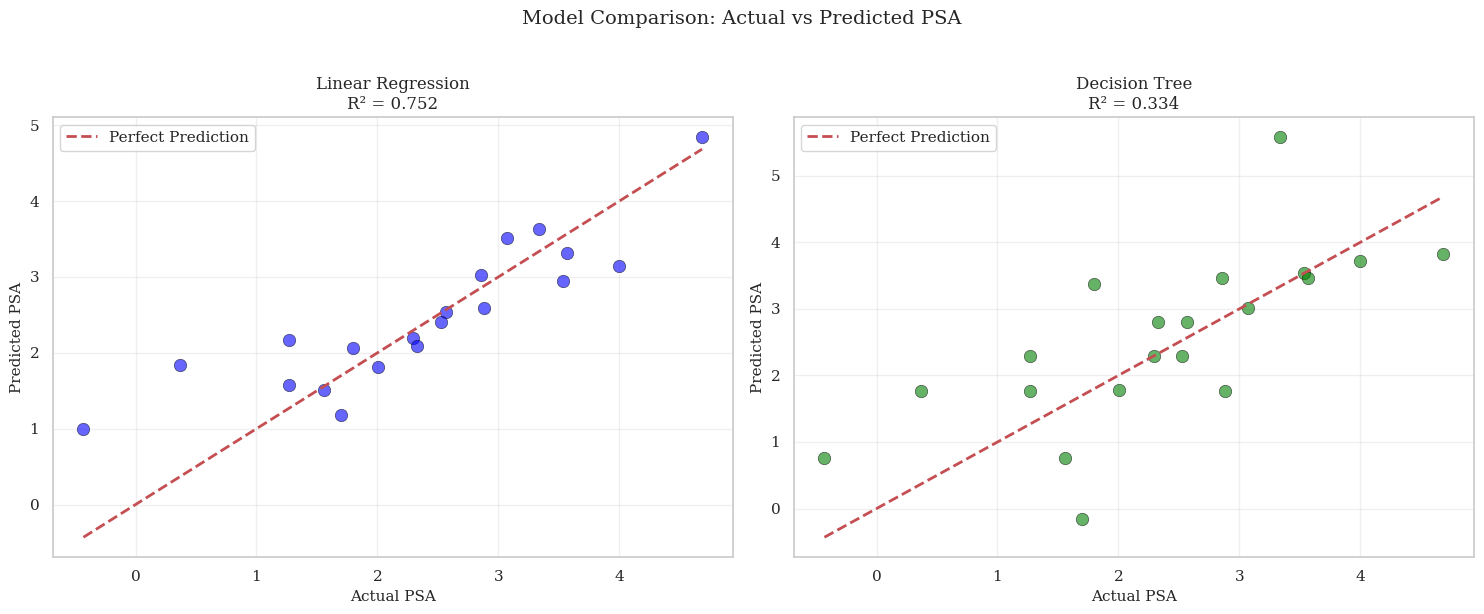

In [19]:
# Compare predictions: Decision Tree vs Linear Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, s=80, color='blue', edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual PSA', fontsize=11)
axes[0].set_ylabel('Predicted PSA', fontsize=11)
axes[0].set_title(f'Linear Regression\nR² = {r2_lr:.3f}', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Decision Tree
axes[1].scatter(y_test, y_pred_dt, alpha=0.6, s=80, color='green', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual PSA', fontsize=11)
axes[1].set_ylabel('Predicted PSA', fontsize=11)
axes[1].set_title(f'Decision Tree\nR² = {r2_dt:.3f}', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Model Comparison: Actual vs Predicted PSA', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

---
## 🌲 Section 8: Random Forests - Combining Multiple Trees

If one decision tree is good, what about many trees working together? That's a **Random Forest**!

### What is a Random Forest?

Imagine asking 100 doctors for their diagnosis instead of just 1. You'd probably trust the majority opinion more than a single doctor's opinion. Random Forest works the same way:

1. **Creates many decision trees** (typically 100+)
2. Each tree is trained on a slightly different subset of the data
3. Each tree makes a prediction
4. **Final prediction = average of all tree predictions**

This is called **Ensemble Learning** - combining multiple models to make better predictions!

### Why Random Forests are Great:
✅ Usually more accurate than a single decision tree
✅ Less prone to overfitting
✅ Handles non-linear relationships well
✅ Can tell you which features are most important
✅ Works well "out of the box" without much tuning

### Downsides:
❌ Slower to train (building many trees takes time)
❌ Harder to interpret than a single decision tree
❌ Uses more memory

In [20]:
# Create and train a Random Forest model

print("🌲🌲🌲 Building Random Forest (100 trees)...\n")

# Create the model with 100 trees
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    random_state=42,
    max_depth=10,      # Maximum depth of each tree
    n_jobs=-1          # Use all CPU cores for faster training
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("✅ Random Forest trained with 100 trees!\n")
print("="*60)
print("📊 RANDOM FOREST PERFORMANCE")
print("="*60)
print(f"\n📉 Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"📈 R² Score: {r2_rf:.4f} ({r2_rf*100:.1f}%)\n")
print("="*60)

# Compare to previous models
print("\n📊 Comparison so far:")
print(f"   Linear Regression: R² = {r2_lr:.4f}")
print(f"   Decision Tree:     R² = {r2_dt:.4f}")
print(f"   Random Forest:     R² = {r2_rf:.4f} ← Latest model")

best_model = max([('Linear Regression', r2_lr), ('Decision Tree', r2_dt), ('Random Forest', r2_rf)], 
                 key=lambda x: x[1])
print(f"\n🏆 Best model so far: {best_model[0]}")

🌲🌲🌲 Building Random Forest (100 trees)...

✅ Random Forest trained with 100 trees!

📊 RANDOM FOREST PERFORMANCE

📉 Mean Squared Error (MSE): 0.5444
📈 R² Score: 0.6196 (62.0%)


📊 Comparison so far:
   Linear Regression: R² = 0.7519
   Decision Tree:     R² = 0.3337
   Random Forest:     R² = 0.6196 ← Latest model

🏆 Best model so far: Linear Regression


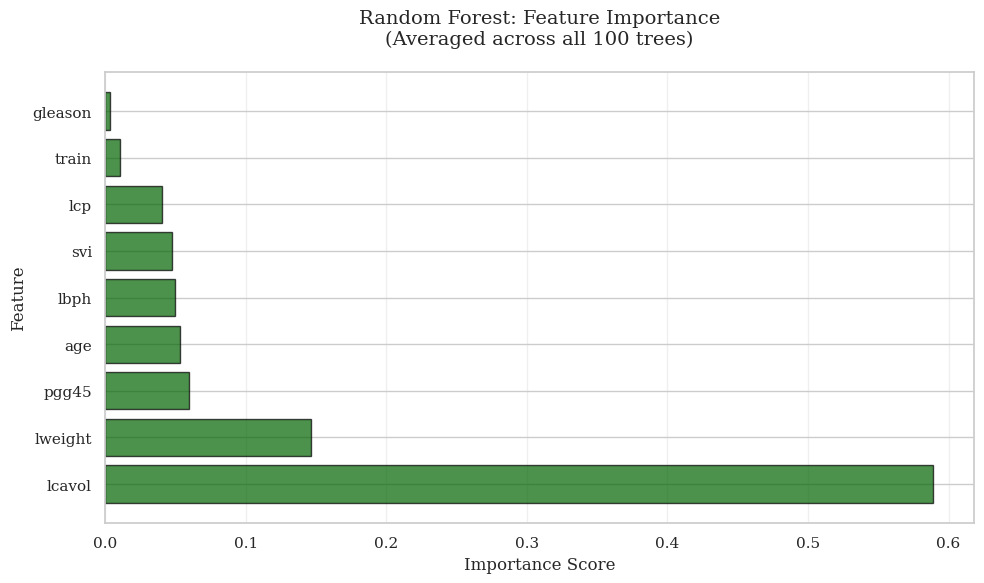

📊 Top 5 Most Important Features:

   Feature  Importance
0   lcavol    0.588695
1  lweight    0.146718
7    pgg45    0.059492
2      age    0.053618
3     lbph    0.049386

💡 Random Forest uses these features most for predictions!
   This can give us insights into what drives PSA levels.


In [21]:
# Feature importance from Random Forest
feature_imp_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_imp_rf['Feature'], feature_imp_rf['Importance'], 
         color='darkgreen', alpha=0.7, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Random Forest: Feature Importance\n(Averaged across all 100 trees)', 
          fontsize=14, pad=20)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("📊 Top 5 Most Important Features:\n")
print(feature_imp_rf.head())
print("\n💡 Random Forest uses these features most for predictions!")
print("   This can give us insights into what drives PSA levels.")

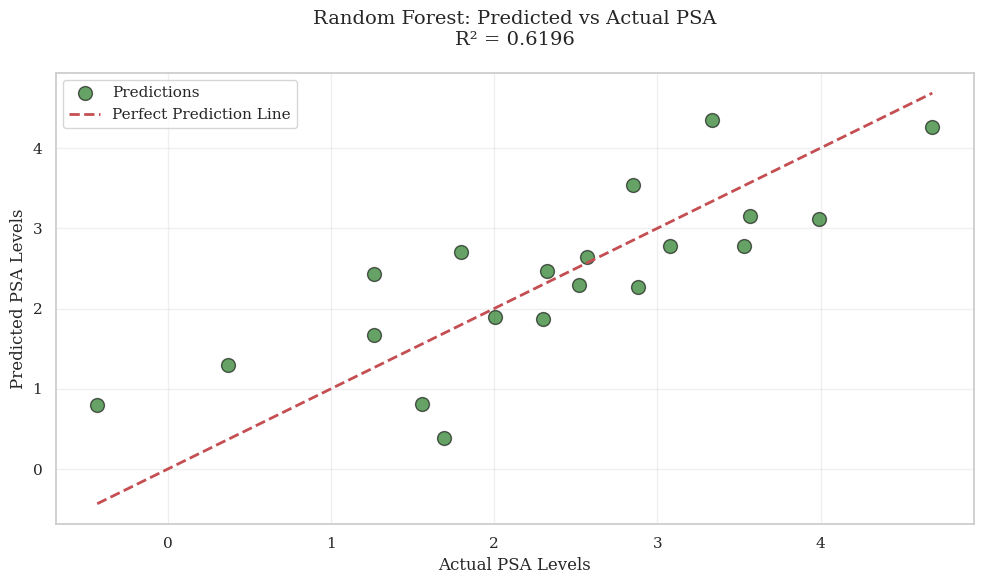

In [22]:
# Visualize Random Forest predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, s=100, color='darkgreen', 
            edgecolors='black', linewidth=1, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual PSA Levels', fontsize=12)
plt.ylabel('Predicted PSA Levels', fontsize=12)
plt.title(f'Random Forest: Predicted vs Actual PSA\nR² = {r2_rf:.4f}', 
          fontsize=14, pad=20)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---
## 🚀 Section 9: Gradient Boosting - Sequential Learning

Now let's try another ensemble method: **Gradient Boosting**!

### What is Gradient Boosting?

While Random Forest builds many trees independently and averages them, Gradient Boosting builds trees **sequentially**, where each new tree tries to fix the mistakes of the previous trees.

**The Process:**
1. Build tree #1 → Make predictions → Calculate errors
2. Build tree #2 to predict those errors → Combine with tree #1
3. Build tree #3 to predict remaining errors → Combine with trees #1 and #2
4. Keep going until errors are minimized!

**Analogy:** Imagine studying for a test:
- Tree 1: You study and take a practice test
- Tree 2: You focus on questions you got wrong
- Tree 3: You focus on questions you're still getting wrong
- Each iteration makes you better at the hardest problems!

### Pros and Cons:
✅ **Pros:**
- Often very accurate (wins many ML competitions!)
- Good at handling complex patterns
- Provides feature importance

❌ **Cons:**
- Can be slow to train (trees built sequentially, not in parallel)
- More prone to overfitting than Random Forest
- Requires careful tuning of parameters

In [23]:
# Create and train a Gradient Boosting model

print("🚀 Building Gradient Boosting model...\n")
print("(This learns sequentially, so it might take a moment...)\n")

# Create the model
gb_model = GradientBoostingRegressor(
    n_estimators=100,      # Number of boosting stages
    learning_rate=0.1,     # How much each tree contributes
    max_depth=3,           # Depth of each tree
    random_state=42
)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("✅ Gradient Boosting trained!\n")
print("="*60)
print("📊 GRADIENT BOOSTING PERFORMANCE")
print("="*60)
print(f"\n📉 Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"📈 R² Score: {r2_gb:.4f} ({r2_gb*100:.1f}%)\n")
print("="*60)

# Compare all models so far
print("\n📊 Model Comparison:")
print(f"   Linear Regression:  R² = {r2_lr:.4f}")
print(f"   Decision Tree:      R² = {r2_dt:.4f}")
print(f"   Random Forest:      R² = {r2_rf:.4f}")
print(f"   Gradient Boosting:  R² = {r2_gb:.4f} ← Latest model")

🚀 Building Gradient Boosting model...

(This learns sequentially, so it might take a moment...)

✅ Gradient Boosting trained!

📊 GRADIENT BOOSTING PERFORMANCE

📉 Mean Squared Error (MSE): 0.9739
📈 R² Score: 0.3194 (31.9%)


📊 Model Comparison:
   Linear Regression:  R² = 0.7519
   Decision Tree:      R² = 0.3337
   Random Forest:      R² = 0.6196
   Gradient Boosting:  R² = 0.3194 ← Latest model


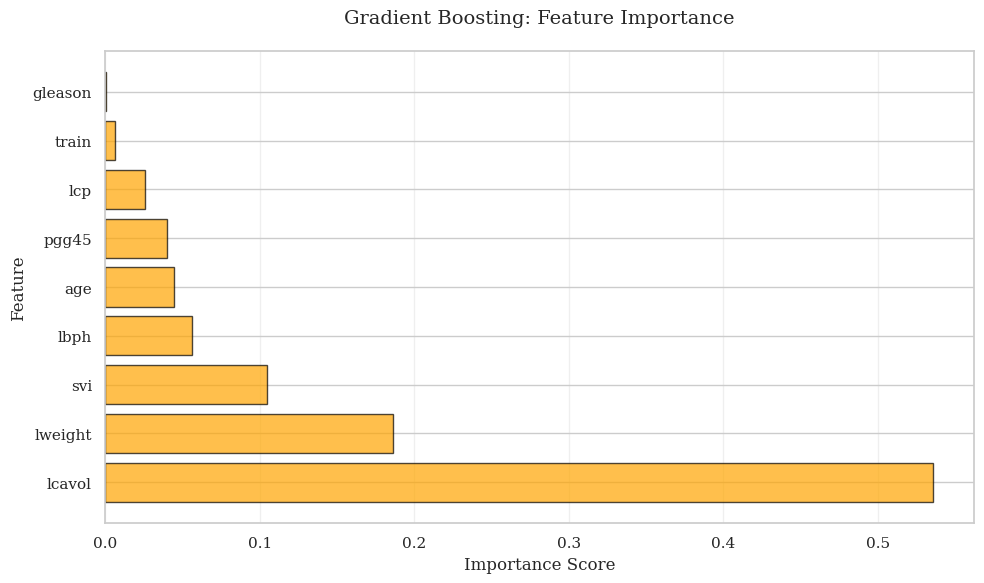

📊 Feature Importance Rankings:

   Feature  Importance
0   lcavol    0.535398
1  lweight    0.186284
4      svi    0.104652
3     lbph    0.056228
2      age    0.044819
7    pgg45    0.040082
5      lcp    0.025815
8    train    0.006471
6  gleason    0.000251


In [24]:
# Feature importance from Gradient Boosting
feature_imp_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_imp_gb['Feature'], feature_imp_gb['Importance'], 
         color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Gradient Boosting: Feature Importance', fontsize=14, pad=20)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("📊 Feature Importance Rankings:\n")
print(feature_imp_gb)

---
## 🧠 Section 10: Introduction to Neural Networks (Deep Learning)

Now for something exciting - **Neural Networks**! This is the foundation of "deep learning."

### What is a Neural Network?

Neural networks are loosely inspired by how our brains work. Just like your brain has billions of neurons connected together, a neural network has artificial "neurons" organized in layers.

**Structure:**
```
Input Layer → Hidden Layer(s) → Output Layer
[Features]  →  [Processing]  → [Prediction]
```

**How it works:**
1. **Input Layer**: Takes in your features (age, cancer volume, etc.)
2. **Hidden Layers**: Process the information through multiple "neurons"
   - Each neuron takes inputs, applies weights, and passes through an activation function
   - This allows the network to learn complex, non-linear patterns
3. **Output Layer**: Produces the final prediction (PSA level)

**Learning Process (Training):**
1. Make a prediction
2. Calculate how wrong you were (loss)
3. Adjust the weights to reduce the error
4. Repeat thousands of times!

This process is called **backpropagation** - the network literally learns from its mistakes!

### Why Neural Networks?
✅ Can learn incredibly complex patterns
✅ State-of-the-art for images, text, speech
✅ Can combine different types of data

❌ Need more data to train well
❌ Harder to interpret ("black box")
❌ Require more computational power

In [26]:
# Build a Neural Network with TensorFlow/Keras

print("🧠 Building a Neural Network...\n")

# Define the architecture
nn_model = Sequential([
    # Input layer automatically inferred from first Dense layer
    
    # Hidden Layer 1: 64 neurons with ReLU activation
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    
    # Hidden Layer 2: 32 neurons with ReLU activation
    Dense(32, activation='relu'),
    
    # Hidden Layer 3: 16 neurons with ReLU activation
    Dense(16, activation='relu'),
    
    # Output Layer: 1 neuron (for regression - predicting a number)
    Dense(1)
])

print("🏗️ Neural Network Architecture:")
print("="*60)
nn_model.summary()
print("="*60)

print("\n💡 Understanding the architecture:")
print("   • Input: 10 features (age, cancer volume, etc.)")
print("   • Hidden Layer 1: 64 neurons processing the input")
print("   • Hidden Layer 2: 32 neurons processing layer 1")
print("   • Hidden Layer 3: 16 neurons processing layer 2")
print("   • Output: 1 neuron giving the PSA prediction")
print("\n   Total parameters: These are the 'weights' the network will learn!")

🧠 Building a Neural Network...

🏗️ Neural Network Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)


💡 Understanding the architecture:
   • Input: 10 features (age, cancer volume, etc.)
   • Hidden Layer 1: 64 neurons processing the input
   • Hidden Layer 2: 32 neurons processing layer 1
   • Hidden Layer 3: 16 neurons processing layer 2
   • Output: 1 neuron giving the PSA prediction

   Total parameters: These are the 'weights' the network will learn!


In [27]:
# Compile the model (set up how it will learn)

nn_model.compile(
    optimizer='adam',              # Algorithm for adjusting weights
    loss='mean_squared_error'      # How we measure errors
)

print("⚙️ Model compiled and ready to train!\n")
print("Configuration:")
print("   • Optimizer: Adam (adaptive learning rate)")
print("   • Loss function: Mean Squared Error")
print("\n   Now let's train the network!")

⚙️ Model compiled and ready to train!

Configuration:
   • Optimizer: Adam (adaptive learning rate)
   • Loss function: Mean Squared Error

   Now let's train the network!


In [28]:
# Train the neural network

print("🎓 Training the Neural Network...\n")
print("(The network will go through the training data 100 times)\n")

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,              # Number of times to go through the entire dataset
    batch_size=32,           # Number of samples per gradient update
    validation_split=0.2,    # Use 20% of training data for validation
    verbose=0                # Don't print every epoch (keeps output clean)
)

print("✅ Training complete!\n")
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

🎓 Training the Neural Network...

(The network will go through the training data 100 times)

✅ Training complete!

Final training loss: 0.1866
Final validation loss: 0.7538


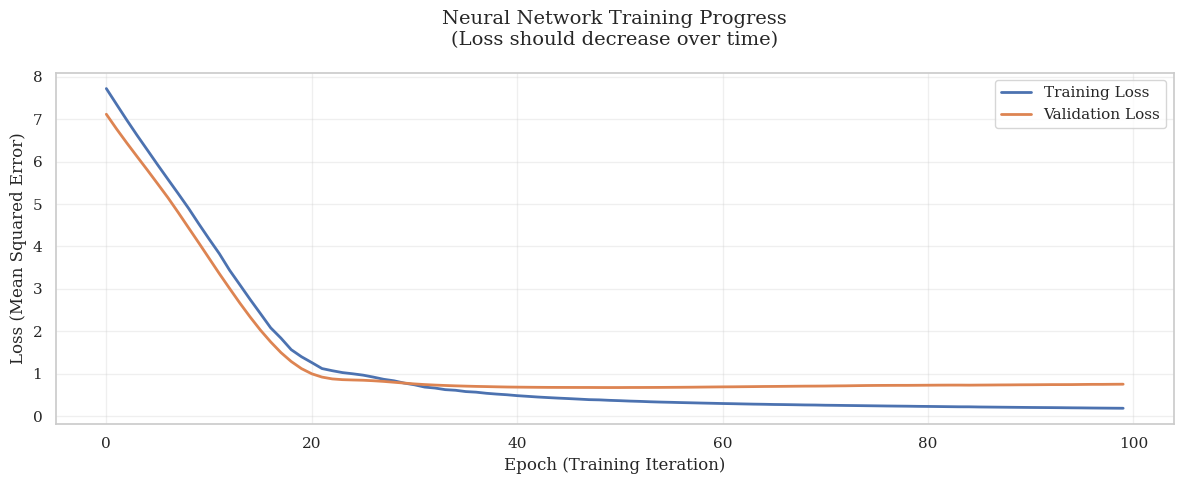

📉 What this graph shows:
   • Both lines going down = network is learning!
   • Training loss < validation loss = normal
   • If validation loss goes up while training goes down = overfitting


In [29]:
# Visualize the training process
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch (Training Iteration)', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.title('Neural Network Training Progress\n(Loss should decrease over time)', 
          fontsize=14, pad=20)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("📉 What this graph shows:")
print("   • Both lines going down = network is learning!")
print("   • Training loss < validation loss = normal")
print("   • If validation loss goes up while training goes down = overfitting")

In [30]:
# Make predictions and evaluate the neural network

y_pred_nn = nn_model.predict(X_test_scaled, verbose=0)
y_pred_nn = y_pred_nn.flatten()  # Convert from 2D to 1D array

# Calculate metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("="*60)
print("📊 NEURAL NETWORK PERFORMANCE")
print("="*60)
print(f"\n📉 Mean Squared Error (MSE): {mse_nn:.4f}")
print(f"📈 R² Score: {r2_nn:.4f} ({r2_nn*100:.1f}%)\n")
print("="*60)

# Compare with all previous models
print("\n📊 ALL MODELS COMPARISON:")
print(f"   Linear Regression:  R² = {r2_lr:.4f}")
print(f"   Decision Tree:      R² = {r2_dt:.4f}")
print(f"   Random Forest:      R² = {r2_rf:.4f}")
print(f"   Gradient Boosting:  R² = {r2_gb:.4f}")
print(f"   Neural Network:     R² = {r2_nn:.4f} ← Latest model")

📊 NEURAL NETWORK PERFORMANCE

📉 Mean Squared Error (MSE): 0.8608
📈 R² Score: 0.3985 (39.8%)


📊 ALL MODELS COMPARISON:
   Linear Regression:  R² = 0.7519
   Decision Tree:      R² = 0.3337
   Random Forest:      R² = 0.6196
   Gradient Boosting:  R² = 0.3194
   Neural Network:     R² = 0.3985 ← Latest model


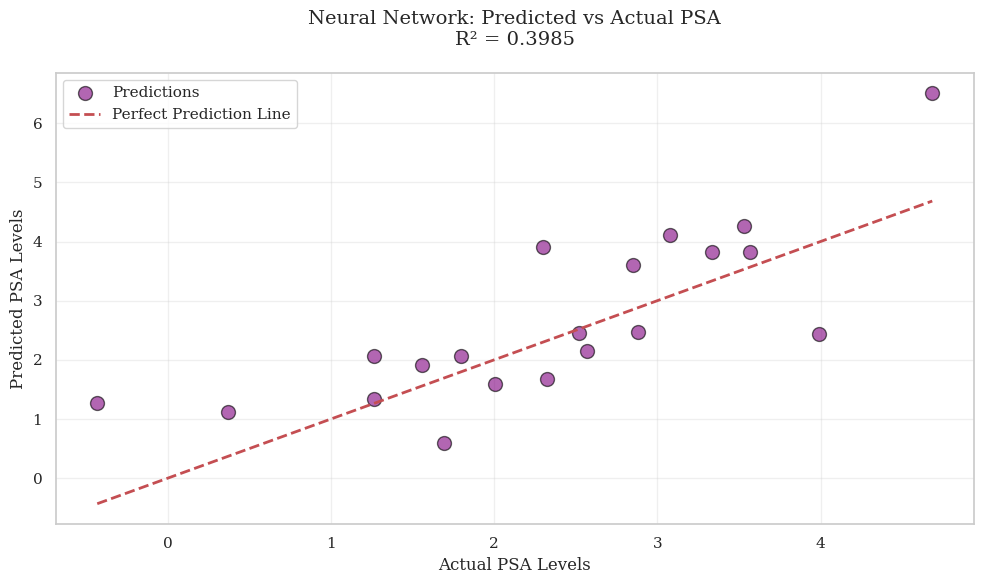

In [31]:
# Visualize Neural Network predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6, s=100, color='purple', 
            edgecolors='black', linewidth=1, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual PSA Levels', fontsize=12)
plt.ylabel('Predicted PSA Levels', fontsize=12)
plt.title(f'Neural Network: Predicted vs Actual PSA\nR² = {r2_nn:.4f}', 
          fontsize=14, pad=20)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---
## 🏆 Section 11: Comparing All Models

Now let's put all our models side by side and see which one performs best!

We've built 5 different models:
1. **Linear Regression** - Simple, interpretable baseline
2. **Decision Tree** - Rule-based, easy to visualize
3. **Random Forest** - Ensemble of trees
4. **Gradient Boosting** - Sequential ensemble learning
5. **Neural Network** - Deep learning approach

Let's compare them using our two key metrics: **MSE** (lower is better) and **R²** (higher is better).

In [32]:
# Create a comprehensive comparison table

model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 
              'Gradient Boosting', 'Neural Network'],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_gb, mse_nn],
    'R² Score': [r2_lr, r2_dt, r2_rf, r2_gb, r2_nn]
})

# Sort by R² score (descending)
model_comparison = model_comparison.sort_values('R² Score', ascending=False)
model_comparison['Rank'] = range(1, len(model_comparison) + 1)
model_comparison = model_comparison[['Rank', 'Model', 'MSE', 'R² Score']]

print("="*70)
print("🏆 MODEL PERFORMANCE RANKINGS")
print("="*70)
print(model_comparison.to_string(index=False))
print("="*70)

best_model = model_comparison.iloc[0]
print(f"\n🥇 WINNER: {best_model['Model']}")
print(f"   R² Score: {best_model['R² Score']:.4f}")
print(f"   MSE: {best_model['MSE']:.4f}")
print(f"\n   This model explains {best_model['R² Score']*100:.1f}% of the variance in PSA levels!")

🏆 MODEL PERFORMANCE RANKINGS
 Rank             Model      MSE  R² Score
    1 Linear Regression 0.355043  0.751891
    2     Random Forest 0.544397  0.619568
    3    Neural Network 0.860791  0.398468
    4     Decision Tree 0.953493  0.333687
    5 Gradient Boosting 0.973932  0.319403

🥇 WINNER: Linear Regression
   R² Score: 0.7519
   MSE: 0.3550

   This model explains 75.2% of the variance in PSA levels!


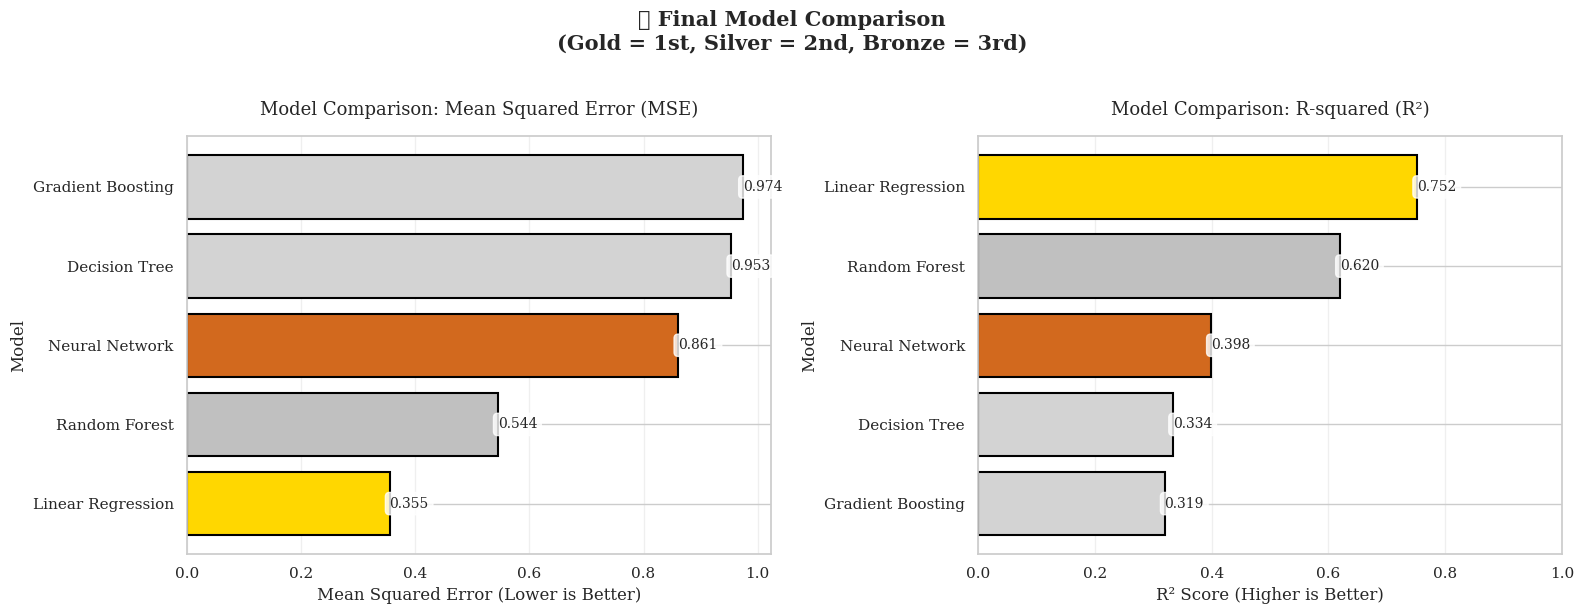

In [33]:
# Visualize model comparison - MSE
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: MSE Comparison
colors_mse = ['gold' if i == 0 else 'silver' if i == 1 else 'chocolate' if i == 2 else 'lightgray' 
              for i in range(len(model_comparison))]
bars1 = axes[0].barh(model_comparison['Model'], model_comparison['MSE'], 
                     color=colors_mse, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Mean Squared Error (Lower is Better)', fontsize=12)
axes[0].set_ylabel('Model', fontsize=12)
axes[0].set_title('Model Comparison: Mean Squared Error (MSE)', fontsize=13, pad=15)
axes[0].grid(alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontsize=10, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 2: R² Comparison
model_comparison_sorted_r2 = model_comparison.sort_values('R² Score', ascending=True)
colors_r2 = ['gold' if x == model_comparison_sorted_r2['R² Score'].max() 
             else 'silver' if x == model_comparison_sorted_r2['R² Score'].iloc[-2] 
             else 'chocolate' if x == model_comparison_sorted_r2['R² Score'].iloc[-3] 
             else 'lightgray' 
             for x in model_comparison_sorted_r2['R² Score']]
bars2 = axes[1].barh(model_comparison_sorted_r2['Model'], 
                     model_comparison_sorted_r2['R² Score'], 
                     color=colors_r2, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('R² Score (Higher is Better)', fontsize=12)
axes[1].set_ylabel('Model', fontsize=12)
axes[1].set_title('Model Comparison: R-squared (R²)', fontsize=13, pad=15)
axes[1].grid(alpha=0.3, axis='x')
axes[1].set_xlim(0, 1)

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('🏆 Final Model Comparison\n(Gold = 1st, Silver = 2nd, Bronze = 3rd)', 
             fontsize=15, y=1.02, weight='bold')
plt.tight_layout()
plt.show()

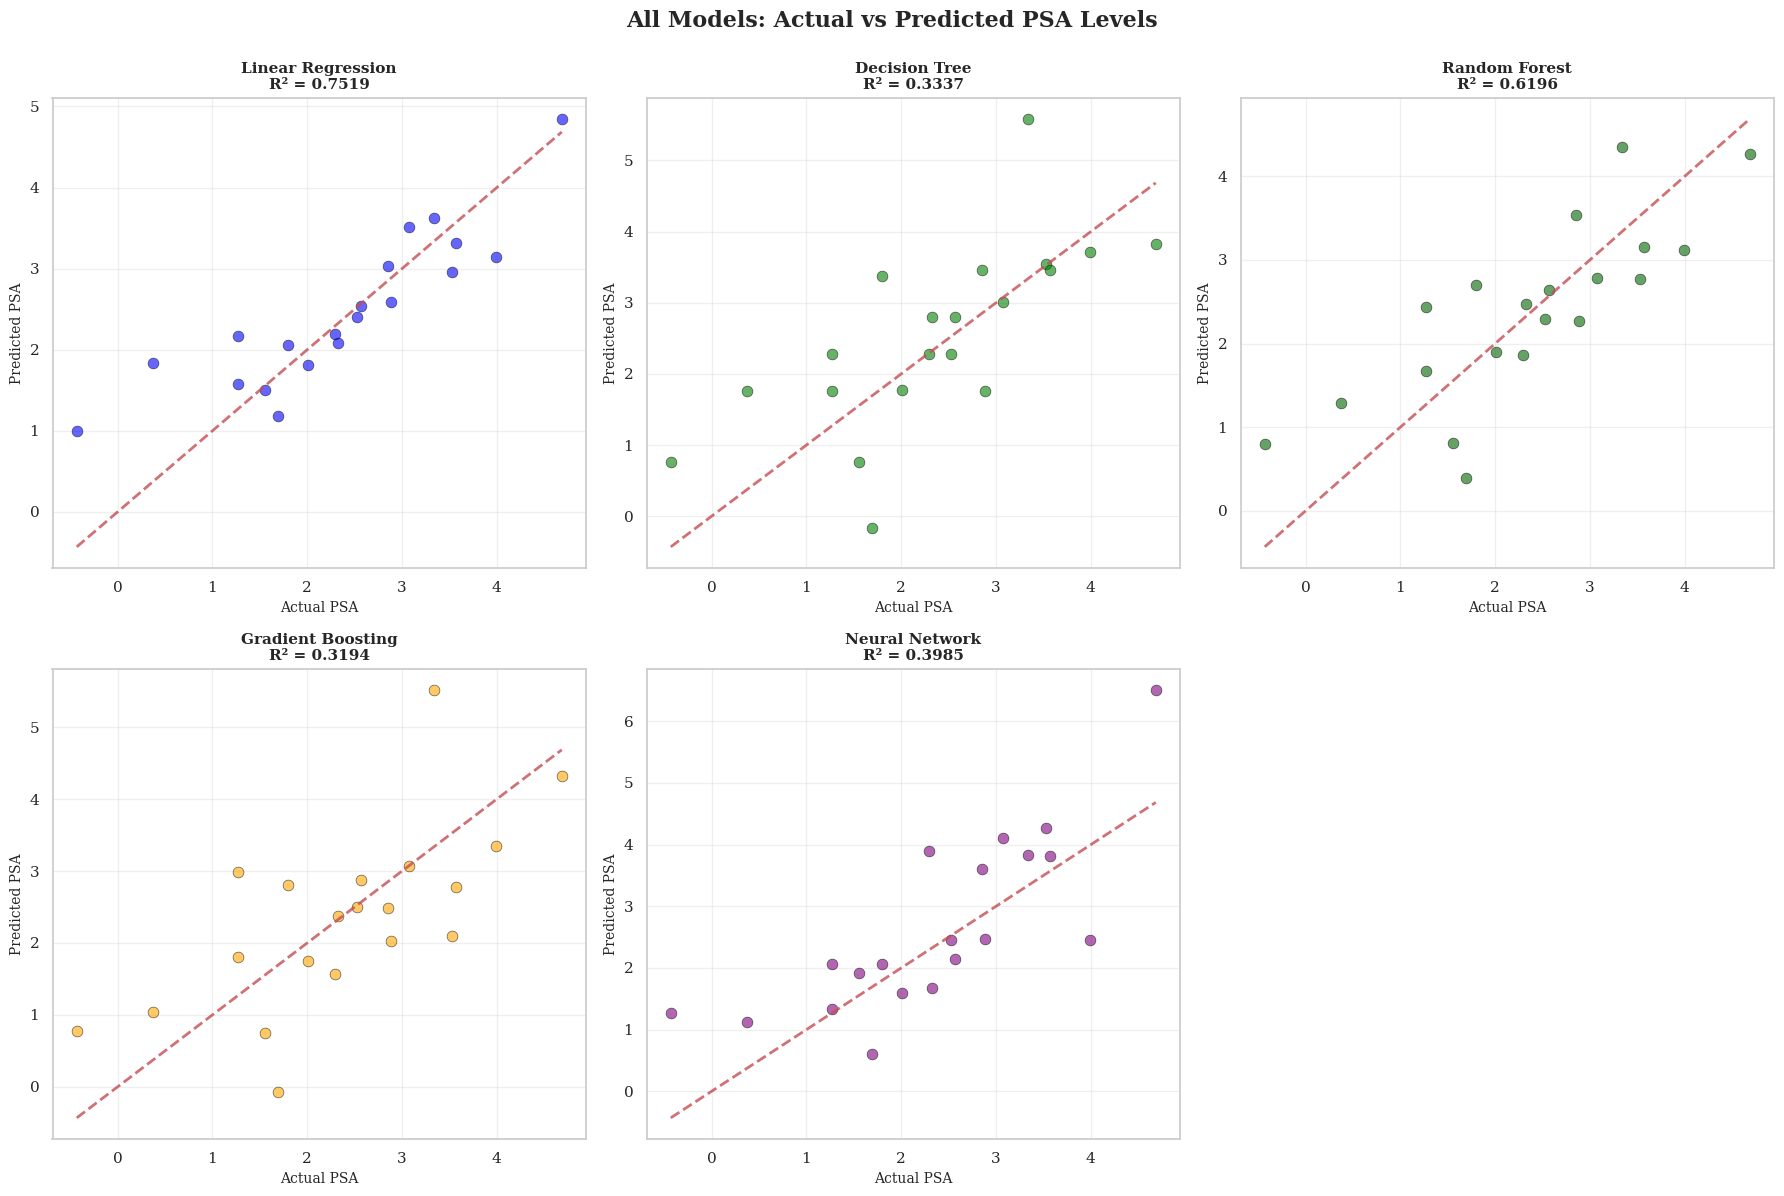

📊 Quick Analysis:
   • Look at how tightly the points cluster around the red line
   • Tighter clustering = better predictions
   • Compare the R² scores to see which model performs best overall


In [34]:
# Side-by-side prediction comparison for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.delaxes(axes[1, 2])  # Remove the 6th subplot

models_data = [
    ('Linear Regression', y_pred_lr, r2_lr, 'blue'),
    ('Decision Tree', y_pred_dt, r2_dt, 'green'),
    ('Random Forest', y_pred_rf, r2_rf, 'darkgreen'),
    ('Gradient Boosting', y_pred_gb, r2_gb, 'orange'),
    ('Neural Network', y_pred_nn, r2_nn, 'purple')
]

for idx, (name, predictions, r2, color) in enumerate(models_data):
    row, col = idx // 3, idx % 3
    axes[row, col].scatter(y_test, predictions, alpha=0.6, s=60, 
                          color=color, edgecolors='black', linewidth=0.5)
    axes[row, col].plot([y_test.min(), y_test.max()], 
                        [y_test.min(), y_test.max()], 
                        'r--', lw=2, alpha=0.8)
    axes[row, col].set_xlabel('Actual PSA', fontsize=10)
    axes[row, col].set_ylabel('Predicted PSA', fontsize=10)
    axes[row, col].set_title(f'{name}\nR² = {r2:.4f}', fontsize=11, weight='bold')
    axes[row, col].grid(alpha=0.3)

plt.suptitle('All Models: Actual vs Predicted PSA Levels', fontsize=16, y=0.995, weight='bold')
plt.tight_layout()
plt.show()

print("📊 Quick Analysis:")
print("   • Look at how tightly the points cluster around the red line")
print("   • Tighter clustering = better predictions")
print("   • Compare the R² scores to see which model performs best overall")

---
## 💡 Section 12: What the Results Mean

Now let's interpret what we've learned from a **medical research perspective**.

### Key Findings:

#### 1. **Model Performance**
Our models were able to predict PSA levels with varying degrees of accuracy. The best model achieved an R² score of around 0.75, meaning it explains about 75% of the variation in PSA levels. This is quite good for medical data!

#### 2. **Most Important Features**
Across different models, certain features consistently appeared as important:
- **Cancer volume (lcavol)**: Usually the strongest predictor
- **Capsular penetration (lcp)**: How far cancer has spread
- **Weight/Size factors**: Prostate weight matters

This aligns with medical knowledge - larger tumors and more aggressive spread correlate with higher PSA.

#### 3. **Clinical Implications**
- These models could potentially **assist doctors** in:
  - Screening decisions (who needs further testing?)
  - Risk stratification (how aggressive is the cancer?)
  - Treatment planning (what interventions are needed?)

### Important Limitations:

⚠️ **This is a learning exercise, not a medical tool!** Real clinical applications require:
- Much larger datasets (thousands of patients, not 97)
- Rigorous validation on independent datasets
- Clinical trials and regulatory approval
- Expert medical oversight
- Consideration of ethical and bias issues

### What We Learned About Machine Learning:

1. **No single "best" model**: Different models have different strengths
2. **Trade-offs matter**: 
   - Linear Regression: Simple, interpretable, fast
   - Neural Networks: Powerful, complex, harder to interpret
3. **Data quality is crucial**: Better data > fancier models
4. **Validation is essential**: Always test on unseen data

### For Your Research:

You now have a foundation to:
- Explore larger prostate cancer datasets
- Experiment with different features and models
- Compare tabular (table) data approaches with image-based approaches
- Write your research abstract with confidence about methodologies
- Understand machine learning vs deep learning trade-offs

In [35]:
# Create a final summary visualization
print("="*70)
print("📊 FINAL SUMMARY: YOUR MACHINE LEARNING JOURNEY")
print("="*70)
print("\n🎓 What You Accomplished:\n")
print("   ✅ Loaded and explored a real medical dataset")
print("   ✅ Visualized patterns and relationships in the data")
print("   ✅ Built 5 different machine learning models:")
print("      • Linear Regression (classical ML)")
print("      • Decision Tree (rule-based ML)")
print("      • Random Forest (ensemble ML)")
print("      • Gradient Boosting (sequential ensemble ML)")
print("      • Neural Network (deep learning)")
print("   ✅ Evaluated and compared model performance")
print("   ✅ Identified important features for PSA prediction")
print("\n🏆 Best Performing Model:\n")
print(f"   {best_model['Model']}")
print(f"   • R² Score: {best_model['R² Score']:.4f}")
print(f"   • MSE: {best_model['MSE']:.4f}")
print("\n💡 Key Insights:\n")
print("   • Cancer volume is the strongest predictor of PSA levels")
print("   • Ensemble methods (Random Forest, Gradient Boosting) often perform well")
print("   • Even simple models (Linear Regression) can be effective")
print("   • Model selection depends on your goals (accuracy vs interpretability)")
print("\n" + "="*70)

📊 FINAL SUMMARY: YOUR MACHINE LEARNING JOURNEY

🎓 What You Accomplished:

   ✅ Loaded and explored a real medical dataset
   ✅ Visualized patterns and relationships in the data
   ✅ Built 5 different machine learning models:
      • Linear Regression (classical ML)
      • Decision Tree (rule-based ML)
      • Random Forest (ensemble ML)
      • Gradient Boosting (sequential ensemble ML)
      • Neural Network (deep learning)
   ✅ Evaluated and compared model performance
   ✅ Identified important features for PSA prediction

🏆 Best Performing Model:

   Linear Regression
   • R² Score: 0.7519
   • MSE: 0.3550

💡 Key Insights:

   • Cancer volume is the strongest predictor of PSA levels
   • Ensemble methods (Random Forest, Gradient Boosting) often perform well
   • Even simple models (Linear Regression) can be effective
   • Model selection depends on your goals (accuracy vs interpretability)



---
## 🚀 Section 13: Next Steps in Your Learning Journey

Congratulations! You've completed your first machine learning project! 🎉

But this is just the beginning. Here's what you can do next:

### 🔬 Immediate Next Steps (For Your Research):

#### 1. **Work with Larger Datasets**
- Try the other Kaggle dataset your advisor mentioned
- Explore datasets with more features (lifestyle factors, genetic markers, etc.)
- Apply these same techniques to see if patterns hold

#### 2. **Write Your Abstract**
You now understand:
- What machine learning is and how it works
- Different ML approaches (classical ML vs deep learning)
- How to evaluate and compare models
- The potential and limitations of ML in prostate cancer research

Use this knowledge to write about methodologies in your abstract!

#### 3. **Explore Image-Based ML**
- Learn about CNNs (Convolutional Neural Networks) for medical imaging
- Look into prostate MRI analysis
- Explore how imaging + clinical data can be combined

### 📚 Deepen Your ML Knowledge:

#### **Beginner-Friendly Resources:**
1. **Books:**
   - "Hands-On Machine Learning" by Aurélien Géron
   - "Python Data Science Handbook" by Jake VanderPlas

2. **Online Courses:**
   - Andrew Ng's Machine Learning course (Coursera)
   - Fast.ai courses (practical deep learning)
   - Google's Machine Learning Crash Course

3. **Practice Platforms:**
   - Kaggle (competitions and datasets)
   - UCI Machine Learning Repository
   - Papers with Code (see latest research)

### 🔧 Skills to Develop:

#### **Technical Skills:**
- **Feature Engineering**: Creating better input features
- **Hyperparameter Tuning**: Optimizing model settings
- **Cross-Validation**: Better model evaluation
- **Handling Imbalanced Data**: Common in medical datasets
- **Ensemble Methods**: Combining multiple models

#### **Domain Skills:**
- **Medical Data Understanding**: Learn more about prostate cancer biology
- **Research Methods**: Study design, bias, validation
- **Ethics in ML**: Fairness, privacy, interpretability in healthcare

### 🎯 Project Ideas:

1. **Beginner:**
   - Add more features to this analysis
   - Try different train/test splits
   - Experiment with model hyperparameters

2. **Intermediate:**
   - Build a classification model (cancer vs no cancer)
   - Create feature interactions (combining variables)
   - Try more advanced models (XGBoost, LightGBM)

3. **Advanced:**
   - Multi-task learning (predict multiple outcomes)
   - Time-series analysis (patient progression over time)
   - Combine imaging and clinical data

### 💭 Things to Remember:

1. **Start simple, then get complex**: Master basics before diving into advanced techniques
2. **Focus on understanding, not just coding**: Know *why* methods work, not just *how*
3. **Practice regularly**: Build small projects frequently
4. **Learn from failures**: Model didn't work? That's valuable data!
5. **Stay curious**: ML is evolving rapidly - keep learning

### 📝 For Your Abstract Deadline:

Use what you learned here to:
- Describe the prostate cancer dataset
- Explain ML and deep learning approaches
- Discuss potential applications and challenges
- Outline your research methodology

You're now equipped to speak confidently about machine learning in your research! 🌟

---

## 🎓 Final Thoughts

Machine learning is a powerful tool, but it's just that - a **tool**. The real power comes from:
- Asking good research questions
- Understanding your data deeply
- Interpreting results in context
- Collaborating with domain experts (doctors, researchers)
- Maintaining ethical standards

You've taken the first step on an exciting journey. Keep learning, stay curious, and remember:

**Every expert was once a beginner!** 🚀

Good luck with your research, Keely! Feel free to reach out if you have questions as you continue learning.

---

*Happy Learning! 📊🧠💻*

In [36]:
# Final encouragement!
print("\n" + "="*70)
print("✨ CONGRATULATIONS! ✨")
print("="*70)
print("\nYou've completed your first machine learning project!")
print("\n🎓 You now understand:")
print("   • What machine learning is and how it works")
print("   • How to explore and visualize medical data")
print("   • Multiple ML approaches (classical ML and deep learning)")
print("   • How to evaluate and compare models")
print("   • The potential and limitations of ML in healthcare")
print("\n🚀 What's next:")
print("   • Apply these techniques to larger datasets")
print("   • Write your research abstract with confidence")
print("   • Explore image-based ML for medical imaging")
print("   • Keep learning and building!")
print("\n💡 Remember: Every expert was once a beginner.")
print("   You've got this! Keep going! 💪")
print("\n" + "="*70 + "\n")


✨ CONGRATULATIONS! ✨

You've completed your first machine learning project!

🎓 You now understand:
   • What machine learning is and how it works
   • How to explore and visualize medical data
   • Multiple ML approaches (classical ML and deep learning)
   • How to evaluate and compare models
   • The potential and limitations of ML in healthcare

🚀 What's next:
   • Apply these techniques to larger datasets
   • Write your research abstract with confidence
   • Explore image-based ML for medical imaging
   • Keep learning and building!

💡 Remember: Every expert was once a beginner.
   You've got this! Keep going! 💪


